<a href="https://colab.research.google.com/github/ValdazoAmerico/Keras-binary-classification/blob/main/Keras_binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

In [3]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [6]:
train_labels[:5]

[1, 0, 1, 0, 1]

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
sacled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [10]:
sacled_train_samples[:5]

array([[0.77011494],
       [0.89655172],
       [0.3908046 ],
       [0.68965517],
       [0.79310345]])

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [13]:
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'),
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x=sacled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, shuffle=True, epochs=30, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6527 - accuracy: 0.5397 - val_loss: 0.6401 - val_accuracy: 0.6095 - 1s/epoch - 6ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6298 - accuracy: 0.6307 - val_loss: 0.6129 - val_accuracy: 0.7000 - 335ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6028 - accuracy: 0.7222 - val_loss: 0.5846 - val_accuracy: 0.7333 - 347ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5747 - accuracy: 0.7698 - val_loss: 0.5533 - val_accuracy: 0.8000 - 348ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5433 - accuracy: 0.8079 - val_loss: 0.5193 - val_accuracy: 0.8429 - 343ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5105 - accuracy: 0.8296 - val_loss: 0.4841 - val_accuracy: 0.8476 - 329ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4776 - accuracy: 0.8582 - val_loss: 0.4498 - val_accuracy: 0.8571 - 312ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4467 - accuracy: 0.8693 - val_loss: 0.4179 - val_accuracy: 0.8714 - 327ms/epoch - 2ms/step
Epo

In [20]:
test_labels = []
test_samples = []
for i in range(50):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(1000):
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

test_labels, test_samples = shuffle(test_labels, test_samples)

In [21]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [22]:
predictions = model.predict(
    x=scaled_test_samples,
    batch_size=10,
    verbose=0
)

In [24]:
predictions[:5]

array([[0.43770203, 0.562298  ],
       [0.07493181, 0.9250682 ],
       [0.96896106, 0.03103891],
       [0.70282596, 0.29717407],
       [0.96809065, 0.03190942]], dtype=float32)

In [25]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 1, 0, 0, 0])

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [27]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [30]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Confusion matrix, without normalization
[[ 965   85]
 [  49 1001]]


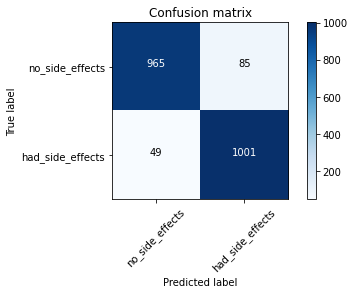

In [31]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion matrix')